Nama:

In [46]:
print("Nama : Hanun Masitha Ramadhani")

Nama : Hanun Masitha Ramadhani


(1) Split X, y dari dataset churn. y = average utilization ratio

In [47]:
import pandas as pd
df_churn = pd.read_csv('churn.csv')
df_churn

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [48]:
missing = []
persen = []

for i in df_churn.columns:
    missing.append(df_churn[i].isnull().sum())
    persen.append(df_churn[i].isnull().sum()/len(df_churn[i])*100)

proporsi_hilang = pd.DataFrame({
        'kolom' : df_churn.columns,
        'missing' : missing,
        'persen_missing' : persen
})
    
proporsi_hilang

,kolom,missing,persen_missing
0,CLIENTNUM,0,0.000000
1,Attrition_Flag,0,0.000000
2,Customer_Age,0,0.000000
3,Gender,0,0.000000
4,Dependent_count,0,0.000000
5,Education_Level,1519,14.999506
6,Marital_Status,749,7.396070
7,Income_Category,0,0.000000
8,Card_Category,0,0.000000
9,Months_on_book,0,0.000000


imputation on Education_Level


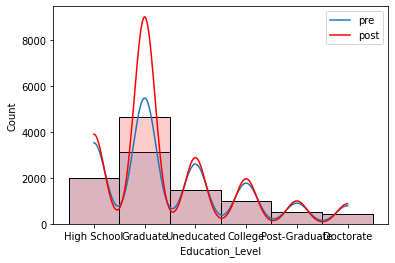

imputation on Marital_Status


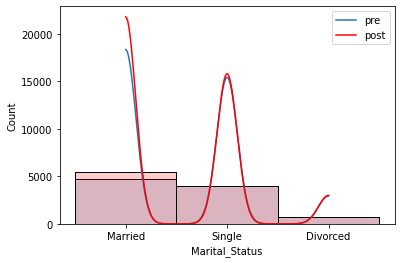

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer 

impute = SimpleImputer(strategy = 'most_frequent')
imputer_result = impute.fit_transform(df_churn)

imputer_result = pd.DataFrame(imputer_result)
imputer_result.columns = df_churn.columns

print("imputation on Education_Level")

sns.histplot(df_churn['Education_Level'], alpha=0.2, kde=True)
sns.histplot(imputer_result['Education_Level'], alpha=0.2, kde=True, color='red')
plt.legend(['pre', 'post'])
plt.show()

print("imputation on Marital_Status")

sns.histplot(df_churn['Marital_Status'], alpha=0.2, kde=True)
sns.histplot(imputer_result['Marital_Status'], alpha=0.2, kde=True, color='red')
plt.legend(['pre', 'post'])
plt.show()

In [50]:
df_churn['Education_Level'] = imputer_result['Education_Level']
df_churn['Marital_Status'] = imputer_result['Marital_Status']

In [51]:
y = df_churn['Avg_Utilization_Ratio']
x = df_churn.drop(['Avg_Utilization_Ratio'], axis = 1)

(2) Split trainset dan testset. test size = 0.2.

In [52]:
# Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2
)

print("Jumlah Data Train : {0}".format(len(X_train)))
print("Jumlah Data Test : {0}".format(len(X_test)))

Jumlah Data Train : 8101
Jumlah Data Test : 2026


(3) Lakukan transformasi yang diperlukan pada trainset.

TRAIN DATA

In [53]:
X_train_obj = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes('number')
X_train_obj

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
3037,Existing Customer,M,Uneducated,Single,$120K +,Blue
1406,Existing Customer,M,High School,Married,$40K - $60K,Blue
3566,Existing Customer,F,Graduate,Married,$40K - $60K,Blue
3162,Existing Customer,F,Graduate,Single,abc,Blue
7639,Existing Customer,M,College,Married,$120K +,Blue
...,...,...,...,...,...,...
382,Existing Customer,M,Uneducated,Married,$120K +,Blue
8125,Attrited Customer,M,Graduate,Single,$80K - $120K,Blue
950,Existing Customer,M,Uneducated,Single,$60K - $80K,Blue
4964,Existing Customer,F,High School,Single,Less than $40K,Blue


In [54]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
oe.fit(X_train_obj)
X_train_obj_transform = oe.transform(X_train_obj)

X_train_obj_transform = pd.DataFrame(X_train_obj_transform)
X_train_obj_transform.columns = X_train_obj.columns
X_train_obj_transform

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1.0,1.0,5.0,2.0,0.0,0.0
1,1.0,1.0,3.0,1.0,1.0,0.0
2,1.0,0.0,2.0,1.0,1.0,0.0
3,1.0,0.0,2.0,2.0,5.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
8096,1.0,1.0,5.0,1.0,0.0,0.0
8097,0.0,1.0,2.0,2.0,3.0,0.0
8098,1.0,1.0,5.0,2.0,2.0,0.0
8099,1.0,0.0,3.0,2.0,4.0,0.0


In [55]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
num_minmax_scaled = minmax_scaler.fit_transform(X_train_num)

num_minmax_scaled = pd.DataFrame(num_minmax_scaled)
num_minmax_scaled.columns = X_train_num.columns
num_minmax_scaled

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,0.016578,0.361702,0.4,0.465116,0.8,0.500000,0.166667,0.867615,0.543504,0.833449,0.212246,0.167575,0.496124,0.251190
1,0.006901,0.234043,0.2,0.348837,0.4,0.666667,0.333333,0.065382,0.491061,0.068249,0.213718,0.071882,0.186047,0.133856
2,0.983960,0.446809,0.8,0.697674,0.6,0.500000,0.666667,0.101570,0.404052,0.109285,0.134825,0.206687,0.534884,0.190703
3,0.088051,0.468085,0.2,0.581395,0.4,0.333333,0.333333,0.652062,0.492253,0.630557,0.209891,0.160510,0.410853,0.130216
4,0.779145,0.425532,0.6,0.627907,1.0,0.500000,0.500000,0.000000,0.000000,0.041393,0.200471,0.240514,0.457364,0.215346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,0.037520,0.680851,0.4,0.837209,1.0,0.333333,0.500000,0.252427,0.712753,0.231380,0.229026,0.072049,0.209302,0.213386
8097,0.035720,0.595745,0.2,0.790698,0.8,1.000000,0.833333,0.185373,0.383393,0.191126,0.208714,0.116223,0.395349,0.237468
8098,0.671309,0.276596,0.2,0.209302,0.6,0.500000,0.500000,0.234771,0.335717,0.241958,0.198116,0.072883,0.372093,0.171101
8099,0.004180,0.382979,0.8,0.534884,1.0,0.333333,0.500000,0.006581,0.567739,0.006289,0.228731,0.208523,0.519380,0.210025


In [56]:
X_train_enc = pd.concat([X_train_obj_transform,num_minmax_scaled], axis=1)

DATA TEST

In [57]:
X_test_obj = X_test.select_dtypes('object')
X_test_num = X_test.select_dtypes('number')
X_test_obj

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
5648,Attrited Customer,M,High School,Married,$80K - $120K,Blue
6354,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2217,Existing Customer,M,Uneducated,Married,$80K - $120K,Blue
3665,Attrited Customer,M,High School,Married,$80K - $120K,Gold
8484,Existing Customer,M,Graduate,Married,$40K - $60K,Blue
...,...,...,...,...,...,...
4855,Existing Customer,M,Graduate,Married,$60K - $80K,Blue
3983,Attrited Customer,M,Doctorate,Married,$80K - $120K,Blue
2814,Existing Customer,M,Uneducated,Single,$120K +,Blue
3995,Existing Customer,M,College,Divorced,$60K - $80K,Blue


In [58]:
X_test_obj_transform = oe.transform(X_test_obj)

X_test_obj_transform = pd.DataFrame(X_test_obj_transform)
X_test_obj_transform.columns = X_test_obj.columns
X_test_obj_transform

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0.0,1.0,3.0,1.0,3.0,0.0
1,1.0,0.0,2.0,2.0,4.0,0.0
2,1.0,1.0,5.0,1.0,3.0,0.0
3,0.0,1.0,3.0,1.0,3.0,1.0
4,1.0,1.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...
2021,1.0,1.0,2.0,1.0,2.0,0.0
2022,0.0,1.0,1.0,1.0,3.0,0.0
2023,1.0,1.0,5.0,2.0,0.0,0.0
2024,1.0,1.0,0.0,0.0,2.0,0.0


In [59]:
num_minmax_scaled = minmax_scaler.transform(X_test_num)

num_minmax_scaled = pd.DataFrame(num_minmax_scaled)
num_minmax_scaled.columns = X_test_num.columns
num_minmax_scaled

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,0.013351,0.404255,0.6,0.534884,0.6,0.500000,0.333333,0.072759,0.000000,0.111140,0.175155,0.092578,0.224806,0.110053
1,0.593741,0.425532,1.0,0.348837,0.4,0.333333,0.500000,0.029800,0.861740,0.007100,0.180453,0.205797,0.511628,0.214786
2,0.670226,0.212766,0.8,0.279070,0.6,0.500000,0.500000,0.133253,0.688121,0.118936,0.179865,0.086013,0.240310,0.179222
3,0.098049,0.382979,0.2,0.534884,0.2,0.333333,0.500000,1.000000,0.000000,1.000000,0.175449,0.076833,0.186047,0.059927
4,0.080323,0.382979,0.6,0.534884,0.0,0.166667,0.166667,0.348534,1.000000,0.302556,0.231675,0.223100,0.496124,0.213386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,0.531941,0.361702,0.6,0.441860,0.6,0.166667,0.500000,0.031372,0.772348,0.015128,0.259346,0.195560,0.426357,0.163820
2022,0.006246,0.425532,0.4,0.372093,0.0,0.333333,0.833333,0.490624,0.000000,0.511708,0.167501,0.070379,0.248062,0.155699
2023,0.509230,0.531915,0.8,0.744186,1.0,0.333333,0.500000,0.322353,1.000000,0.277459,0.215779,0.087682,0.263566,0.212826
2024,0.659225,0.510638,0.8,0.720930,0.6,0.333333,0.500000,0.377073,0.858164,0.340260,0.214895,0.094247,0.387597,0.186782


In [60]:
X_test_enc = pd.concat([X_test_obj_transform,num_minmax_scaled], axis=1)

(4) Siapkan 2 regressor learning alg.: linear dan polynomial. Dengan menggunakan cross validation tentukan derajat polynom dan regularisasi yang optimal.

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate

1
2
3
done


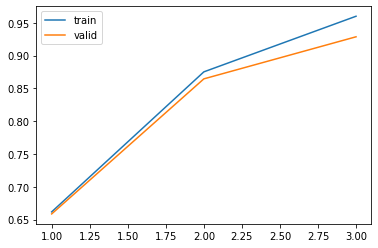

In [64]:
degree = [1,2,3]
train = []
valid = []
a = degree 

for x in a:
    print(x)
    pipeline = make_pipeline(PolynomialFeatures(degree=x, include_bias=False), ElasticNet(alpha=0, l1_ratio=0.5))
    result = cross_validate(pipeline, X_train_enc, y_train, scoring='r2', cv=4,
                            return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

print("done")
sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')
plt.show()

#degree dengan nilai 3 mendapatkan nilai yg optimal dari train dan valid
#selanjutnya akan menggunakan degree = 3

0
0.2
0.5
0.8
1
done


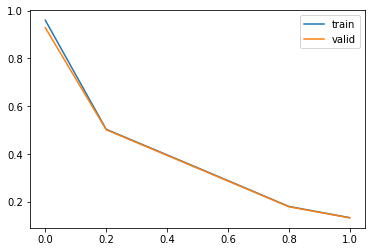

In [65]:
alpha = [0,0.2,0.5,0.8,1]
train = []
valid = []
a = alpha 

for x in a:
    print(x)
    pipeline = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), ElasticNet(alpha=x, l1_ratio=0.5))
    result = cross_validate(pipeline, X_train_enc, y_train, scoring='r2', cv=4,
                            return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

print("done")
sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')
plt.show()

#Nilai alpha paling optimal berada pada nilai 0, sehingga selanjutnya aplha akan bernilai 0

Ridge
ElasticNet
Lasso
no
done


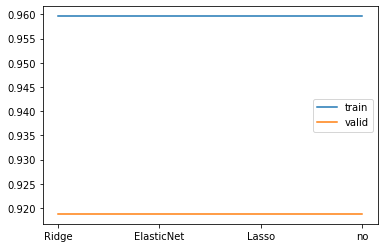

In [71]:
regulation = ['Ridge', 'ElasticNet', 'Lasso', 'no']
train = []
valid = []
a = regulation 

for x in a:
    print(x)
    if(a == 'Lasso'):
        pipeline = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), Ridge(alpha=0))
    elif(a == 'ElasticNet'):   
        pipeline = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), ElasticNet(alpha=0))
    elif(a == 'Lasso'):   
        pipeline = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), Lasso(alpha=0))
    elif(a == 'no'):   
        pipeline = make_pipeline(PolynomialFeatures(degree=3, include_bias=False))
    
    result = cross_validate(pipeline, X_train_enc, y_train, scoring='r2', cv=4,
                            return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

print("done")
sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')
plt.show()

#karena hasil dari perbandingan sama semua, sehingga akan digunakan dengan tidak ada regulasi

In [74]:
pipeline_LR = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), 
                           LinearRegression())
pipeline_Ridge = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), 
                           Ridge(alpha=0))
pipeline_ElasticNet = make_pipeline(PolynomialFeatures(), 
                           ElasticNet(alpha=0))
pipeline_Lasso = make_pipeline(PolynomialFeatures(), 
                           Lasso(alpha=0))

pipeline_LR.fit(X_train_enc, y_train)
pipeline_Ridge.fit(X_train_enc, y_train)
pipeline_ElasticNet.fit(X_train_enc, y_train)
pipeline_Lasso.fit(X_train_enc, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0))])

In [75]:
y_pred_train_LR = pipeline_LR.predict(X_train_enc)
y_pred_test_LR = pipeline_LR.predict(X_test_enc)
y_pred_train_Ridge = pipeline_Ridge.predict(X_train_enc)
y_pred_test_Ridge = pipeline_Ridge.predict(X_test_enc)
y_pred_train_ElasticNet = pipeline_ElasticNet.predict(X_train_enc)
y_pred_test_ElasticNet = pipeline_ElasticNet.predict(X_test_enc)
y_pred_train_Lasso = pipeline_Lasso.predict(X_train_enc)
y_pred_test_Lasso = pipeline_Lasso.predict(X_test_enc)

(5) Print metrics r2, mse, rmse, mae, dan mape trainset vs testset (optimized vs optimized polynomial) dalam bentuk dataframe. Manakah model yang lebih baik performance-nya?

In [77]:
performance = {'train-LR':{}, 'test-LR':{}, 'train-Ridge':{}, 'test-Ridge':{},
    'train-ElasticNet':{}, 'test-ElasticNet':{}, 'train-Lasso':{}, 'test-Lasso':{}}

for x,y,z in zip(
    [y_pred_train_LR, y_pred_test_LR, y_pred_train_Ridge, y_pred_test_Ridge, y_pred_train_ElasticNet, 
          y_pred_test_ElasticNet, y_pred_train_Lasso, y_pred_test_Lasso],
    [y_train, y_test,y_train, y_test,y_train, y_test, y_train, y_test],
    ['train-LR', 'test-LR', 'train-Ridge', 'test-Ridge',
    'train-ElasticNet', 'test-ElasticNet', 'train-Lasso', 'test-Lasso']
):
    
    performance[z]['r2']=r2_score(y, x)
    performance[z]['mse']=mean_squared_error(y, x)
    performance[z]['rmse']=mean_squared_error(y, x)**(1/2)
    performance[z]['mae']=mean_absolute_error(y, x)
    performance[z]['mape']=mean_absolute_percentage_error(y, x)

In [79]:
performance = pd.DataFrame(performance).T

In [80]:
performance.style.highlight_max(color='lightblue', axis =0)

,r2,mse,rmse,mae,mape
train-LR,0.960616,0.003017,0.054924,0.043650,45180456512658.953125
test-LR,0.936699,0.004658,0.068251,0.054104,59529074739448.921875
train-Ridge,0.960220,0.003047,0.055200,0.043840,45556199064976.007812
test-Ridge,0.935917,0.004716,0.068671,0.054340,59809172774467.476562
train-ElasticNet,0.873861,0.009662,0.098295,0.081747,88068390804785.828125
test-ElasticNet,0.863530,0.010043,0.100213,0.083260,88136176179851.046875
train-Lasso,0.873861,0.009662,0.098295,0.081747,88068390804785.828125
test-Lasso,0.863530,0.010043,0.100213,0.083260,88136176179851.046875


Jika dilihat dari hasil tabel diatas, maka menggunakan ElasticNet dan Lasso terbukti lebih optimal dari pada yang lain jika dilihat dari mse, rmse, mae, dan 

jika dilihat dari penilaian r2, hasil tanpa menggunakan regulasilah yang lebih baik